In [7]:
import sklearn
from sklearn.linear_model import Ridge
import time
from scipy.io import loadmat
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

sys.path.insert(0, r"C:\Users\parkf\Desktop\summer2021\projectFilesGitManaged") #temporaraly add the path we need for function list to PATH
import functionList

In [10]:
raw = loadmat(r'C:\Users\parkf\Desktop\summer2021\eegData\sampleData.mat')
X = raw['data'][0][0]['data']
l = X.shape[0]

In [18]:
memVec = [8, 16]
ridgeVec = [.001, .0001]
#ridgeVecNormal = np.dot(ridgeVec,l)

s = (len(memVec),len(ridgeVec),10)
error = np.zeros(s)
runTimes = np.zeros(s)
for memNumber in memVec:
    featureMat = functionList.buildFeatureMat(X,memNumber)
    for regularizer in ridgeVec: 
        ridgeNormal = regularizer*np.trace(np.transpose(featureMat)@featureMat)
        RR = Ridge(alpha=ridgeNormal)
        crossVal = sklearn.model_selection.KFold(n_splits=10)
        cvRun = 0
        for train, test in crossVal.split(featureMat):
            start = time.time()
            RR.fit(featureMat[train,:],X[train])
            end = time.time()
            pred = RR.predict(featureMat[test])
            error[memVec.index(memNumber), ridgeVec.index(regularizer), cvRun] = functionList.findMSE(pred, X[test])
            runTimes[memVec.index(memNumber), ridgeVec.index(regularizer), cvRun] = end - start
            cvRun = cvRun + 1


In [19]:
print(runTimes)
print()
print(error)

[[[0.30618572 0.24338126 0.31814885 0.26229882 0.46789074 0.32293463
   0.2433455  0.24833155 0.28497791 0.24994445]
  [0.24760818 0.25332046 0.3021903  0.24534249 0.24299288 0.2946589
   0.27758265 0.27027893 0.24334979 0.37750912]]

 [[0.54162359 0.57001829 0.55938673 0.55973816 0.49092078 0.63204122
   0.52766657 0.53285098 0.57783222 0.54662609]
  [0.54821658 0.52060914 0.54383922 0.49766994 0.53656483 0.52435231
   0.50065947 0.53656149 0.50764441 0.55928397]]]

[[[0.04213745 0.04238525 0.04166581 0.04217235 0.04179345 0.04120377
   0.03927147 0.04193878 0.04092103 0.03962002]
  [0.02463232 0.02441101 0.02408587 0.024484   0.02417916 0.02427117
   0.02371354 0.02410849 0.0239606  0.02380482]]

 [[0.05030277 0.05066705 0.0499033  0.05049655 0.05006481 0.04928793
   0.04672193 0.05035668 0.04902084 0.04713697]
  [0.0285007  0.02822358 0.02790852 0.02829824 0.02801055 0.02797411
   0.02710846 0.02791302 0.02765538 0.02738366]]]


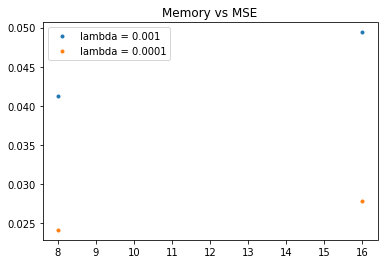

In [20]:
plt.title("Memory vs MSE") #### can update the code below with this type of loop
eAvg = np.mean(error, 2)
for i in range(len(ridgeVec)):
    plt.plot(memVec[:], eAvg[:,i], ".", label = f"lambda = {ridgeVec[i]}")
plt.legend()
plt.show()